In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import copy

In [321]:
datasets = {'Total Residents':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Residents',na_values=['na']),
           'Total Female Residents':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Female Residents',na_values=['na']),
           'Total Male Residents':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Male Residents',na_values=['na']),
           'Total Malays':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Malays',na_values=['na']),
           'Total Male Malays':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Male Malays',na_values=['na']),
           'Total Female Malays':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Female Malays',na_values=['na']),
           'Total Chinese':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Chinese',na_values=['na']),
           'Total Male Chinese':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Male Chinese',na_values=['na']),
           'Total Female Chinese':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Female Chinese',na_values=['na']),
           'Total Indians':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Indians',na_values=['na']),
           'Total Male Indians':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Male Indians',na_values=['na']),
           'Total Female Indians':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'Total Female Indians',na_values=['na']),
           'OEGT':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'OEGT',na_values=['na']),
           'OETM':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'OETM',na_values=['na']),
           'OETF':pd.read_excel('SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).xlsx',sheet_name = 'OETF',na_values=['na'])}

In [322]:
key_list = [keys for keys in datasets]
for i in key_list:
    datasets[i] = datasets[i][~datasets[i]['Data Series'].str.contains('65 Years|70 Years|75 Years|80 Years|85 Years')]
    datasets[i] = datasets[i].fillna(0)
    datasets[i] = datasets[i].rename(columns={'Data Series': 'Age_Group'})
    datasets[i] = pd.melt(datasets[i], id_vars='Age_Group', var_name='Years', value_name='Population')

In [323]:
male_list = ['Total Male Malays','Total Male Chinese','Total Male Indians','OETM']
for i in male_list:
    datasets[i]['Gender'] = 'Male'
    datasets[i]['Ethnicity'] = i
    datasets[i]['Ethnicity'] = datasets[i]['Ethnicity'].str.replace('Total Male', '').str.replace('OETM', 'Others').str.strip()
female_list = ['Total Female Malays','Total Female Chinese','Total Female Indians','OETF']
for i in female_list:
    datasets[i]['Gender'] = 'Female'
    datasets[i]['Ethnicity'] = i
    datasets[i]['Ethnicity'] = datasets[i]['Ethnicity'].str.replace('Total Female', '').str.replace('OETF', 'Others').str.strip()

In [324]:
totals = copy.copy(datasets)

In [325]:
key_list = [keys for keys in totals]
for i in key_list:
    totals[i] = totals[i][totals[i]['Age_Group'].str.contains('Total|Other')].reset_index()
    totals[i] = totals[i].drop('Age_Group',axis=1)
    totals[i] = totals[i].drop('index',axis=1)

In [326]:
key_list = [keys for keys in datasets]
for i in key_list:
    datasets[i] = datasets[i].iloc[:-1,:]

In [327]:
mf = pd.concat([datasets['Total Male Malays'],datasets['Total Female Malays'],datasets['Total Male Indians'],datasets['Total Female Indians'],datasets['Total Male Chinese'],datasets['Total Female Chinese'],datasets['OETM'],datasets['OETF']],axis=0,ignore_index=True)
mf = mf[~mf['Age_Group'].str.contains('Total')]
mf

,Age_Group,Years,Population,Gender,Ethnicity
0,0 - 4 Years,2023.0,20568.0,Male,Malays
1,5 - 9 Years,2023.0,18870.0,Male,Malays
2,10 - 14 Years,2023.0,16006.0,Male,Malays
3,15 - 19 Years,2023.0,17324.0,Male,Malays
4,20 - 24 Years,2023.0,21050.0,Male,Malays
...,...,...,...,...,...
10707,70 - 74 Years,1957.0,165.0,Female,Others
10708,75 - 79 Years,1957.0,74.0,Female,Others
10709,80 - 84 Years,1957.0,41.0,Female,Others
10710,85 - 89 Years,1957.0,0.0,Female,Others


In [330]:
mf.to_csv('for_ethnicity_cleaned_1.csv',index=False)

In [331]:
tot = pd.concat([totals['Total Male Malays'],totals['Total Female Malays'],totals['Total Male Indians'],totals['Total Female Indians'],totals['Total Male Chinese'],totals['Total Female Chinese'],totals['OETM'],totals['OETF']],axis=0,ignore_index=True)
tot 

,Years,Population,Gender,Ethnicity
0,2023.0,279017.0,Male,Malays
1,2022.0,275876.0,Male,Malays
2,2021.0,271743.0,Male,Malays
3,2020.0,271332.0,Male,Malays
4,2019.0,268933.0,Male,Malays
...,...,...,...,...
531,1961.0,14800.0,Female,Others
532,1960.0,14800.0,Female,Others
533,1959.0,14900.0,Female,Others
534,1958.0,14500.0,Female,Others


In [332]:
tot_list = ['Total Malays','Total Chinese','Total Indians','OEGT']
for i in tot_list:
    datasets[i]['Ethnicity'] = i
    datasets[i]['Ethnicity'] = datasets[i]['Ethnicity'].str.replace('Total', '').str.strip()
    datasets[i]['Ethnicity'] = datasets[i]['Ethnicity'].str.replace('OEGT', 'Others').str.strip()
total_whole = pd.concat([datasets['Total Malays'],datasets['Total Indians'],datasets['Total Chinese'],datasets['OEGT']],axis=0,ignore_index=True)
total_whole = total_whole[~total_whole['Age_Group'].str.contains('Total')]
total_whole

,Age_Group,Years,Population,Ethnicity
0,0 - 4 Years,2023.0,40225.0,Malays
1,5 - 9 Years,2023.0,36699.0,Malays
2,10 - 14 Years,2023.0,31170.0,Malays
3,15 - 19 Years,2023.0,33803.0,Malays
4,20 - 24 Years,2023.0,40521.0,Malays
...,...,...,...,...
5351,70 - 74 Years,1957.0,288.0,Others
5352,75 - 79 Years,1957.0,126.0,Others
5353,80 - 84 Years,1957.0,61.0,Others
5354,85 - 89 Years,1957.0,0.0,Others


In [333]:
Residents = datasets['Total Residents'][~datasets['Total Residents']['Age_Group'].str.contains('Total')]
Residents

,Age_Group,Years,Population
0,0 - 4 Years,2023.0,175268.0
1,5 - 9 Years,2023.0,201974.0
2,10 - 14 Years,2023.0,204459.0
3,15 - 19 Years,2023.0,209579.0
4,20 - 24 Years,2023.0,229066.0
...,...,...,...
1334,70 - 74 Years,1957.0,8774.0
1335,75 - 79 Years,1957.0,4225.0
1336,80 - 84 Years,1957.0,1786.0
1337,85 - 89 Years,1957.0,0.0


In [399]:
res_23 = Residents[Residents['Years']==2023.0]
res_23

,Age_Group,Years,Population
0,0 - 4 Years,2023.0,175268.0
1,5 - 9 Years,2023.0,201974.0
2,10 - 14 Years,2023.0,204459.0
3,15 - 19 Years,2023.0,209579.0
4,20 - 24 Years,2023.0,229066.0
5,25 - 29 Years,2023.0,277889.0
6,30 - 34 Years,2023.0,323627.0
7,35 - 39 Years,2023.0,300037.0
8,40 - 44 Years,2023.0,310173.0
9,45 - 49 Years,2023.0,302515.0


In [409]:
res_57 = Residents[Residents['Years']==1957.0]
res_57

,Age_Group,Years,Population
1320,0 - 4 Years,1957.0,264727.0
1321,5 - 9 Years,1957.0,218097.0
1322,10 - 14 Years,1957.0,136280.0
1323,15 - 19 Years,1957.0,135679.0
1324,20 - 24 Years,1957.0,119266.0
1325,25 - 29 Years,1957.0,111726.0
1326,30 - 34 Years,1957.0,89925.0
1327,35 - 39 Years,1957.0,82709.0
1328,40 - 44 Years,1957.0,76217.0
1329,45 - 49 Years,1957.0,66716.0


In [400]:
mf_23 = mf[mf['Years']==2023.0]
mf_23

,Age_Group,Years,Population,Gender,Ethnicity,Age Group Cat
0,0 - 4 Years,2023.0,20568.0,Male,Malays,0
1,5 - 9 Years,2023.0,18870.0,Male,Malays,1
2,10 - 14 Years,2023.0,16006.0,Male,Malays,2
3,15 - 19 Years,2023.0,17324.0,Male,Malays,3
4,20 - 24 Years,2023.0,21050.0,Male,Malays,4
...,...,...,...,...,...,...
8992,75 - 79 Years,2023.0,619.0,Female,Others,15
8993,80 - 84 Years,2023.0,409.0,Female,Others,16
8994,85 - 89 Years,2023.0,285.0,Female,Others,17
8995,90 Years & Over,2023.0,216.0,Female,Others,18


In [407]:
mf_57 = mf[mf['Years']==1957.0]
mf_57

,Age_Group,Years,Population,Gender,Ethnicity,Age Group Cat
1254,0 - 4 Years,1957.0,21743.0,Male,Malays,0
1255,5 - 9 Years,1957.0,14451.0,Male,Malays,1
1256,10 - 14 Years,1957.0,8393.0,Male,Malays,2
1257,15 - 19 Years,1957.0,8528.0,Male,Malays,3
1258,20 - 24 Years,1957.0,10556.0,Male,Malays,4
...,...,...,...,...,...,...
10311,70 - 74 Years,1957.0,165.0,Female,Others,14
10312,75 - 79 Years,1957.0,74.0,Female,Others,15
10313,80 - 84 Years,1957.0,41.0,Female,Others,16
10314,85 - 89 Years,1957.0,0.0,Female,Others,17


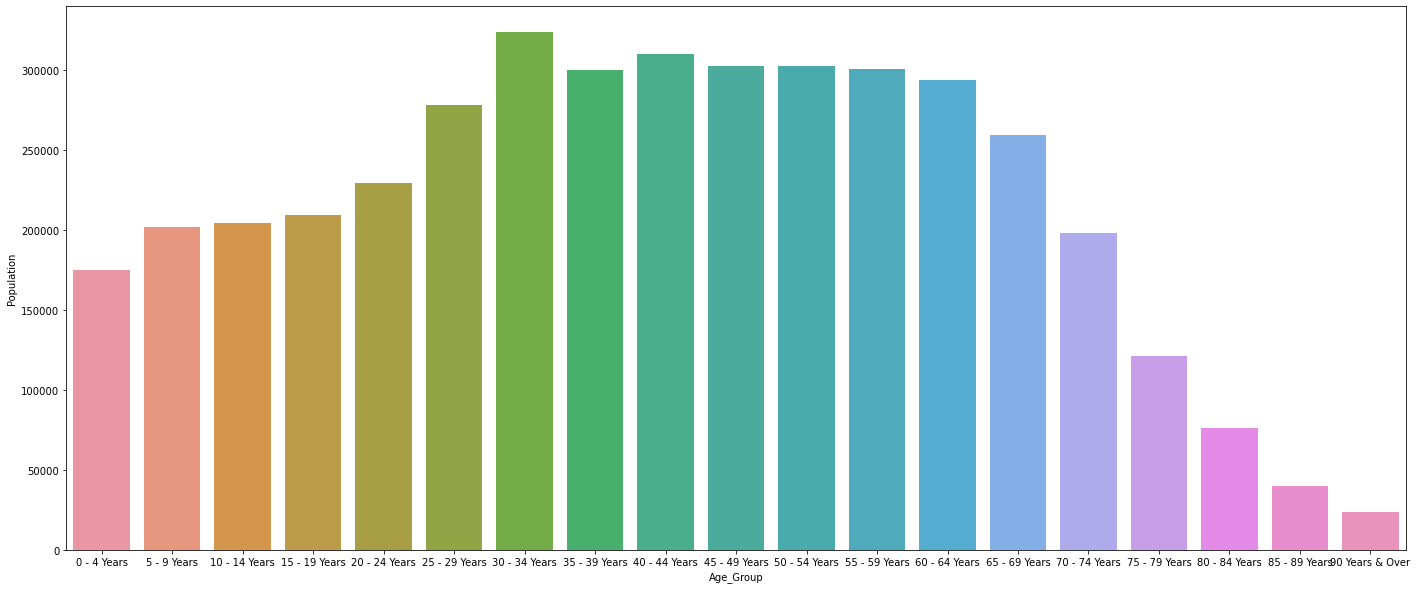

In [401]:
plt.figure(figsize=(24, 10))
sns.barplot(x='Age_Group', y='Population',data=res_23)
plt.show()

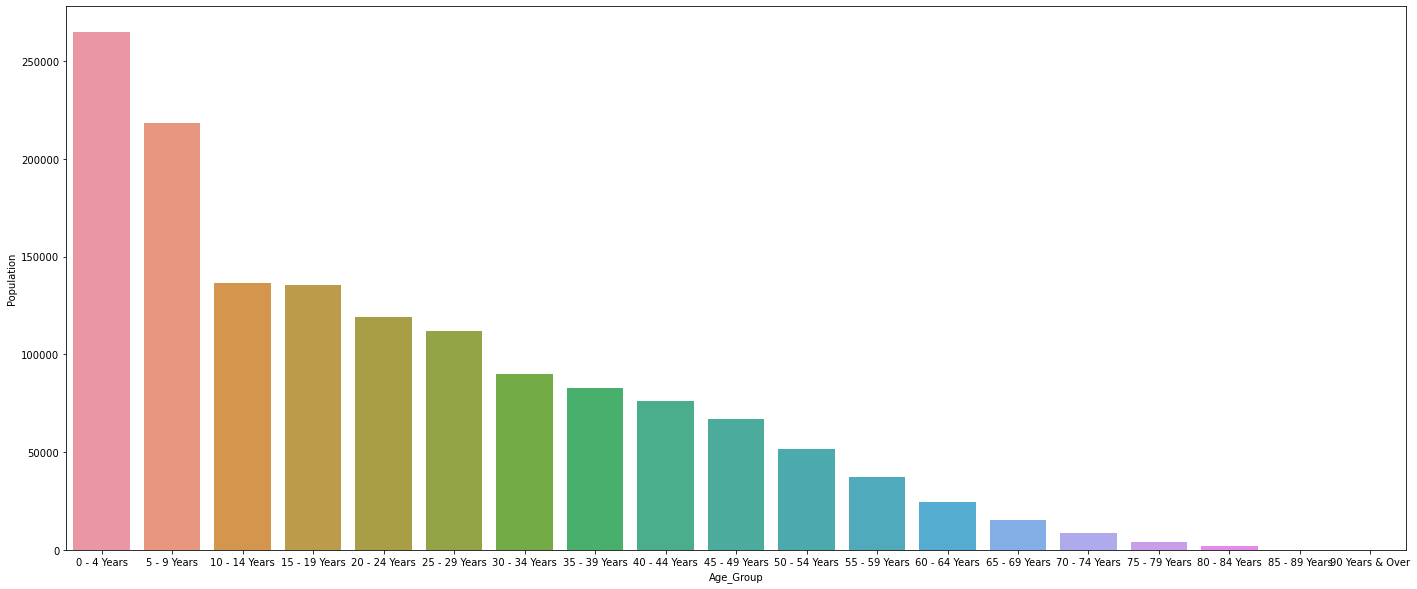

In [410]:
plt.figure(figsize=(24, 10))
sns.barplot(x='Age_Group', y='Population',data=res_57)
plt.show()

<AxesSubplot:xlabel='Ethnicity', ylabel='Population'>

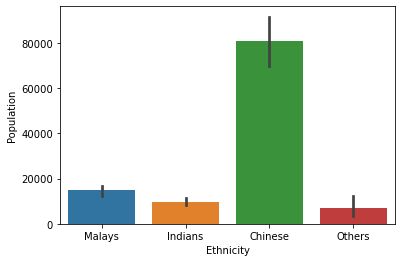

In [402]:
sns.barplot(x='Ethnicity', y='Population',data=mf_23)

<AxesSubplot:xlabel='Ethnicity', ylabel='Population'>

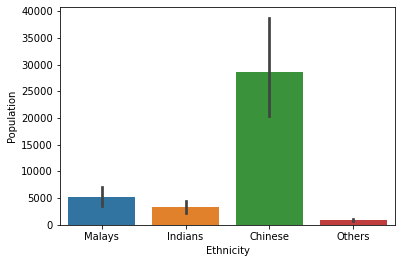

In [412]:
sns.barplot(x='Ethnicity', y='Population',data=mf_57)

<AxesSubplot:xlabel='Ethnicity', ylabel='Population'>

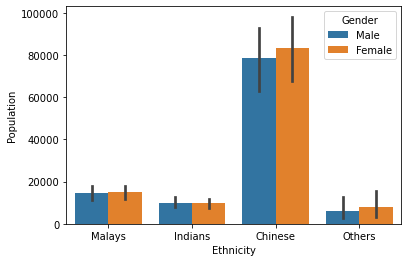

In [403]:
sns.barplot(x='Ethnicity', y='Population', hue='Gender',data=mf_23)

<AxesSubplot:xlabel='Ethnicity', ylabel='Population'>

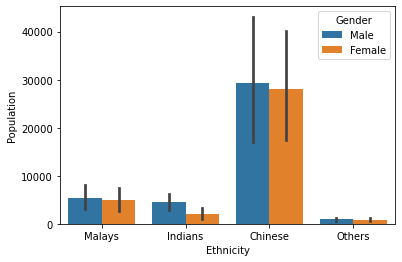

In [413]:
sns.barplot(x='Ethnicity', y='Population', hue='Gender',data=mf_57)

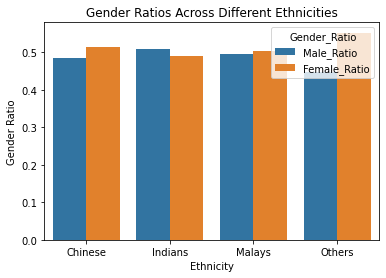

In [404]:
# Assuming mf is your DataFrame
# Calculate the total population for each ethnicity and gender
gender_counts = mf_23.groupby(['Ethnicity', 'Gender'])['Population'].sum().reset_index()

# Pivot the data to have ethnicities as rows and genders as columns
pivot_table = gender_counts.pivot(index='Ethnicity', columns='Gender', values='Population')

# Calculate the gender ratio
pivot_table['Male_Ratio'] = pivot_table['Male'] / (pivot_table['Male'] + pivot_table['Female'])
pivot_table['Female_Ratio'] = pivot_table['Female'] / (pivot_table['Male'] + pivot_table['Female'])

# Reset the index to use 'Ethnicity' in the plot
pivot_table.reset_index(inplace=True)

# Melt the DataFrame to have Gender Ratios and Ethnicities in long format
melted_data = pivot_table.melt(id_vars='Ethnicity', value_vars=['Male_Ratio', 'Female_Ratio'], 
                               var_name='Gender_Ratio', value_name='Value')

# Create the bar plot
sns.barplot(x='Ethnicity', y='Value', hue='Gender_Ratio', data=melted_data)

# Set the labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Gender Ratio')
plt.title('Gender Ratios Across Different Ethnicities')

# Show the plot
plt.show()

In [405]:
# Calculating gender ratio for each ethnicity

# Grouping by Ethnicity and Gender and summing up the Population
gender_counts = mf_23.groupby(['Ethnicity', 'Gender'])['Population'].sum().reset_index()

# Pivot the data to have ethnicities as rows and genders as columns
pivot_table = gender_counts.pivot(index='Ethnicity', columns='Gender', values='Population')

# Calculate the gender ratio
# The ratio is calculated as the proportion of each gender within an ethnicity
pivot_table['Male_Ratio'] = pivot_table['Male'] / (pivot_table['Male'] + pivot_table['Female'])
pivot_table['Female_Ratio'] = pivot_table['Female'] / (pivot_table['Male'] + pivot_table['Female'])

# Reset the index to use 'Ethnicity' as a column
pivot_table.reset_index(inplace=True)

pivot_table[['Ethnicity', 'Male_Ratio', 'Female_Ratio']]


Gender,Ethnicity,Male_Ratio,Female_Ratio
0,Chinese,0.484661,0.515339
1,Indians,0.509295,0.490705
2,Malays,0.497063,0.502937
3,Others,0.447189,0.552811


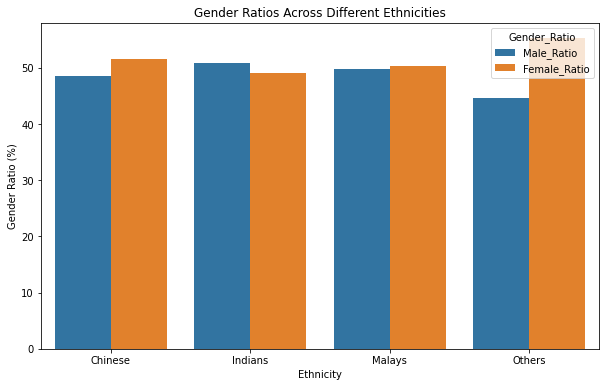

In [406]:
# Melt the DataFrame to have Gender Ratios and Ethnicities in long format for plotting
melted_data = pivot_table.melt(id_vars='Ethnicity', value_vars=['Male_Ratio', 'Female_Ratio'], 
                               var_name='Gender_Ratio', value_name='Ratio')

# Convert the ratios to percentage for better readability in the plot
melted_data['Ratio'] *= 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity', y='Ratio', hue='Gender_Ratio', data=melted_data)

# Set the labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Gender Ratio (%)')
plt.title('Gender Ratios Across Different Ethnicities')

# Show the plot
plt.show()

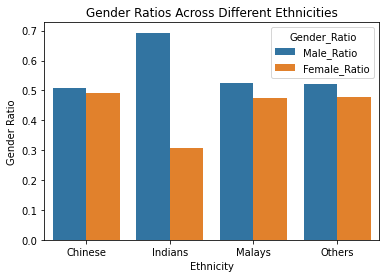

In [419]:
# Assuming mf is your DataFrame
# Calculate the total population for each ethnicity and gender
gender_counts = mf_57.groupby(['Ethnicity', 'Gender'])['Population'].sum().reset_index()

# Pivot the data to have ethnicities as rows and genders as columns
pivot_table = gender_counts.pivot(index='Ethnicity', columns='Gender', values='Population')

# Calculate the gender ratio
pivot_table['Male_Ratio'] = pivot_table['Male'] / (pivot_table['Male'] + pivot_table['Female'])
pivot_table['Female_Ratio'] = pivot_table['Female'] / (pivot_table['Male'] + pivot_table['Female'])

# Reset the index to use 'Ethnicity' in the plot
pivot_table.reset_index(inplace=True)

# Melt the DataFrame to have Gender Ratios and Ethnicities in long format
melted_data = pivot_table.melt(id_vars='Ethnicity', value_vars=['Male_Ratio', 'Female_Ratio'], 
                               var_name='Gender_Ratio', value_name='Value')

# Create the bar plot
sns.barplot(x='Ethnicity', y='Value', hue='Gender_Ratio', data=melted_data)

# Set the labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Gender Ratio')
plt.title('Gender Ratios Across Different Ethnicities')

# Show the plot
plt.show()

In [417]:
# Calculating gender ratio for each ethnicity

# Grouping by Ethnicity and Gender and summing up the Population
gender_counts = mf_57.groupby(['Ethnicity', 'Gender'])['Population'].sum().reset_index()

# Pivot the data to have ethnicities as rows and genders as columns
pivot_table = gender_counts.pivot(index='Ethnicity', columns='Gender', values='Population')

# Calculate the gender ratio
# The ratio is calculated as the proportion of each gender within an ethnicity
pivot_table['Male_Ratio'] = pivot_table['Male'] / (pivot_table['Male'] + pivot_table['Female'])
pivot_table['Female_Ratio'] = pivot_table['Female'] / (pivot_table['Male'] + pivot_table['Female'])

# Reset the index to use 'Ethnicity' as a column
pivot_table.reset_index(inplace=True)

pivot_table[['Ethnicity', 'Male_Ratio', 'Female_Ratio']]


Gender,Ethnicity,Male_Ratio,Female_Ratio
0,Chinese,0.509665,0.490335
1,Indians,0.693039,0.306961
2,Malays,0.524115,0.475885
3,Others,0.522590,0.477410


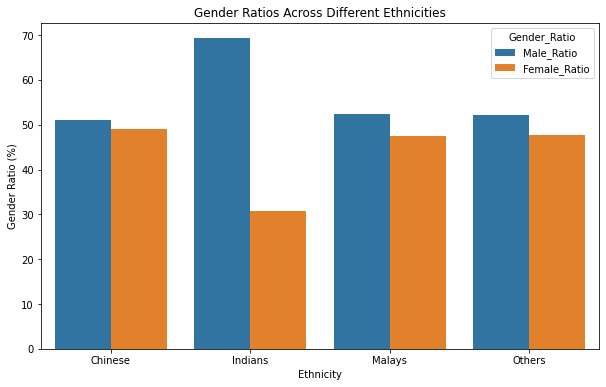

In [418]:
# Melt the DataFrame to have Gender Ratios and Ethnicities in long format for plotting
melted_data = pivot_table.melt(id_vars='Ethnicity', value_vars=['Male_Ratio', 'Female_Ratio'], 
                               var_name='Gender_Ratio', value_name='Ratio')

# Convert the ratios to percentage for better readability in the plot
melted_data['Ratio'] *= 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity', y='Ratio', hue='Gender_Ratio', data=melted_data)

# Set the labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Gender Ratio (%)')
plt.title('Gender Ratios Across Different Ethnicities')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Years', ylabel='Population'>

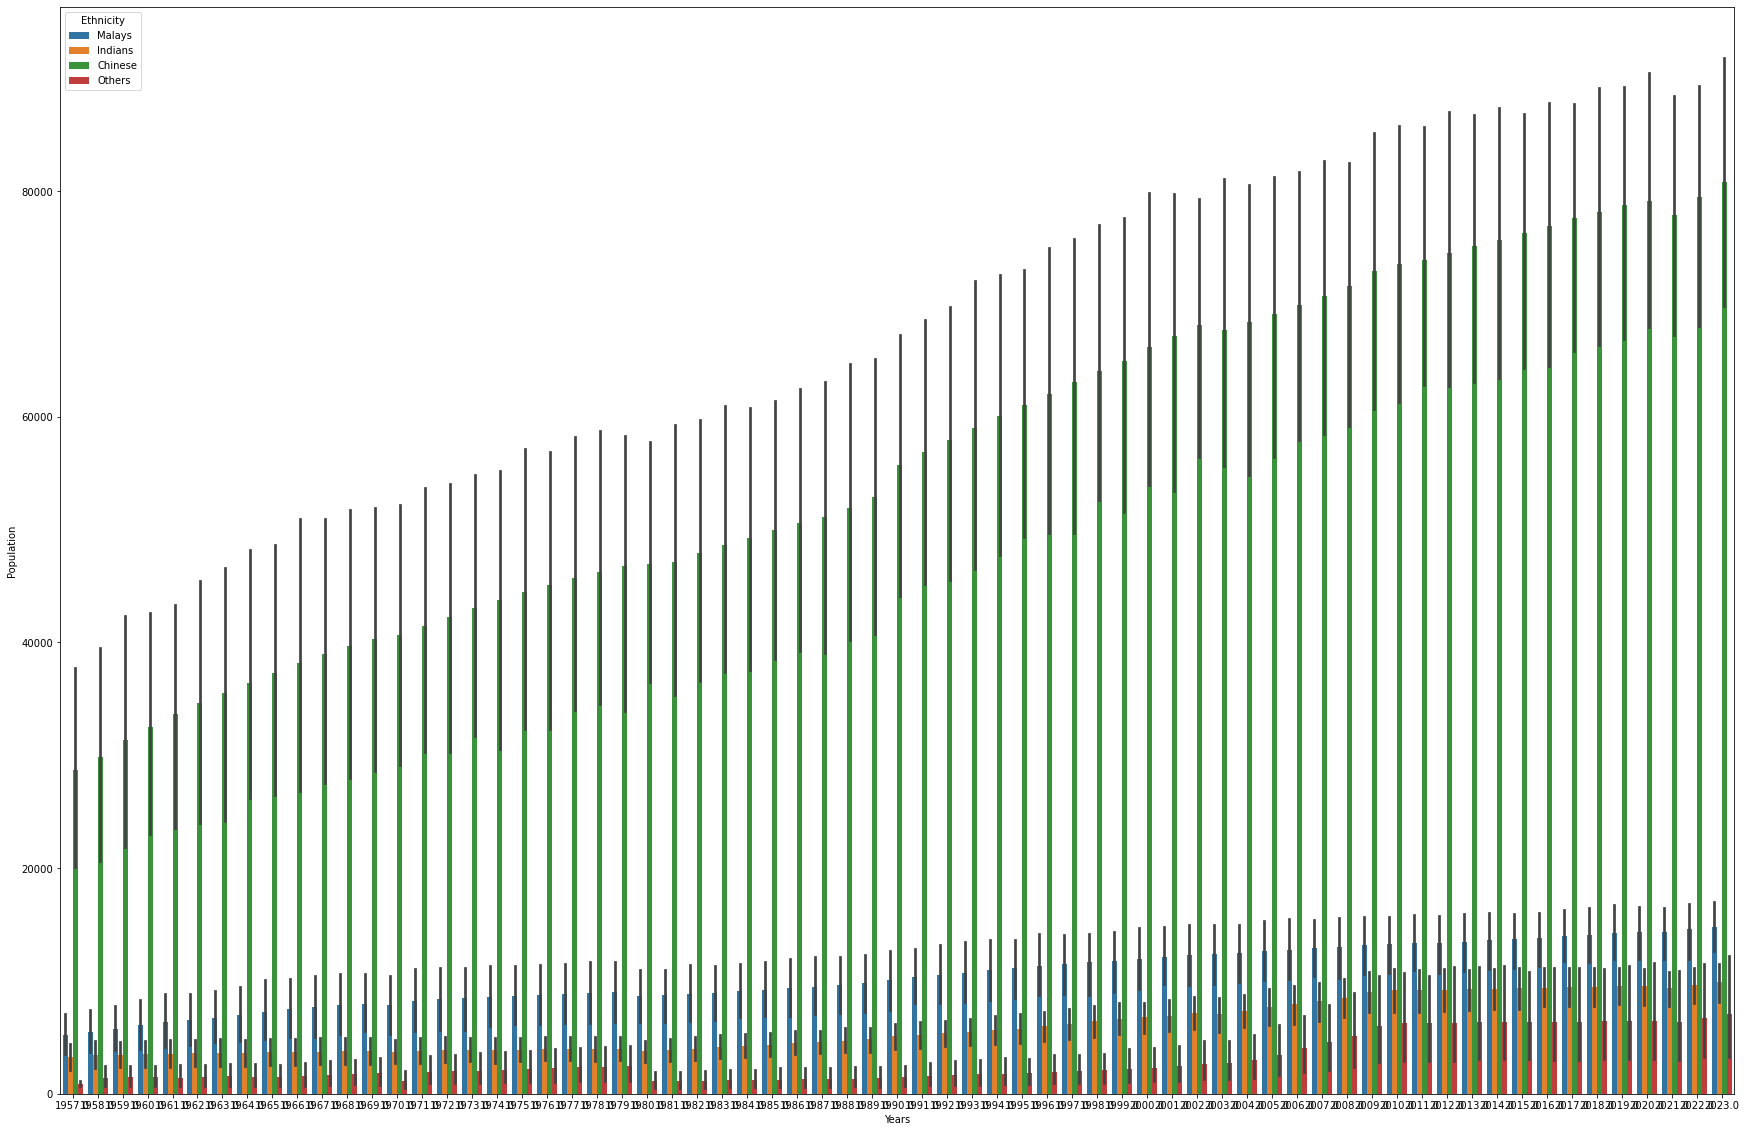

In [386]:
plt.figure(figsize=(30,20))
sns.barplot(x='Years', y='Population',hue='Ethnicity',data=mf)

In [339]:
import plotly.express as px
fig = px.bar(total_whole, x='Ethnicity', y='Population')
fig.show()

In [379]:
fig = px.bar(
    Residents,
    x='Years',
    y='Population',
    color='Age_Group',
    facet_col='Age_Group',
    labels={'Population': 'Population', 'Years': 'Years'},
    title='Population by Age Group Over Years'
)
fig.update_layout(width=3000, height=600)
# Show the plot
fig.show()

In [395]:
fig = px.bar(
    Residents,
    x='Years',
    y='Population',
    color='Ethnicity',
    facet_col='Ethnicity',
    labels={'Population': 'Population', 'Years': 'Years'},
    title='Population by Age Group Over Years'
)
fig.update_layout(width=3000, height=600)
# Show the plot
fig.show()

ValueError: Value of 'facet_col' is not the name of a column in 'data_frame'. Expected one of ['Age_Group', 'Years', 'Population'] but received: Ethnicity

In [380]:
fig = px.scatter(
    Residents,
    x='Years',
    y='Age_Group',
    color='Population',
    facet_col='Age_Group',
    labels={'Population': 'Population', 'Years': 'Years'},
    title='Population by Age Group Over Years'
)
fig.update_layout(width=3000, height=600)
# Show the plot
fig.show()

In [344]:
# Preparing the data for the Ethnicity and Gender Interaction Hypothesis

# Converting categorical variables to dummy variables for Ethnicity and Gender
ethnicity_gender_dummies = pd.get_dummies(mf[['Ethnicity', 'Gender']], drop_first=True)

In [345]:
# Adjusting the approach for creating interaction terms between Ethnicity and Gender

# Re-generating dummy variables for Ethnicity and Gender
ethnicity_dummies = pd.get_dummies(mf['Ethnicity'], prefix='Ethnicity')
gender_dummies = pd.get_dummies(mf['Gender'], prefix='Gender')

# Creating a new DataFrame for interaction terms
interaction_ethnicity_gender_df = pd.DataFrame(index=mf.index)

# Generating interaction terms
for ethnicity_col in ethnicity_dummies.columns:
    for gender_col in gender_dummies.columns:
        interaction_ethnicity_gender_df[f'interaction_{ethnicity_col}_{gender_col}'] = \
            ethnicity_dummies[ethnicity_col] * gender_dummies[gender_col]

In [346]:
# Converting the 'Age Group' column into numerical categories
age_group_categories = {age_group: idx for idx, age_group in enumerate(mf['Age_Group'].unique())}
mf['Age Group Cat'] = mf['Age_Group'].map(age_group_categories)
# Adding the 'Age Group Cat' to the set of independent variables
X_ethnicity_gender_age = pd.concat([interaction_ethnicity_gender_df, mf['Age Group Cat']], axis=1)

# Fit the model using Ordinary Least Squares with interaction terms and age group categories
model_ethnicity_gender_age = sm.OLS(y, sm.add_constant(X_ethnicity_gender_age))
results_ethnicity_gender_age = model_ethnicity_gender_age.fit()

# Display the summary of the regression results with interaction terms and age group categories
results_ethnicity_gender_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2027.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:48:27   Log-Likelihood:            -1.1614e+05
No. Observations:               10316   AIC:                         2.323e+05
Df Residuals:                   10307   BIC:                         2.324e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        3.014e+04    315.625     95.497      0.000    2.95e+04    3.08e+04
interaction_Ethnicity_Chinese_Gender_Female  4.112e+04    493.019     83.407      0.000    4.02e+04    4.21e+04
interaction_Ethnicity_Chinese_Gender_Male    4.072e+04    493.019     82.599      0.000    3.98e+04    4.17e+04
interaction_Ethnicity_Indians_Gender_Female -9915.6129    493.019    -20.112      0.000   -1.09e+04   -8949.200
interaction_Ethnicity_Indians_Gender_Male   -8918.9860    493.019    -18.091      0.000   -9885.399   -7952.573
interaction_Ethnicity_Malays_Gender_Female  -5034.9247    493.019    -10.212      0.000   -6001.338   -4068.512
interaction_Ethnicity_Malays_Gender_Male    -4822.1981    493.019     -9.781      0.000   -5788.611   -3855.785
interaction_Ethnicity_Others_Gender_Female  -1.134e+04    483.572    -23.451      0.000   -1.23e+04   -1.04e+04
interaction_Ethnicity_Others_Gender_Male    -1.167e+04    483.415    -24.143      0.000   -1.26e+04   -1.07e+04
Age Group Cat                               -1647.8625     33.209    -49.620      0.000   -1712.959   -1582.766
==============================================================================
Omnibus:                     1494.674   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4843.097
Skew:                           0.740   Prob(JB):                         0.00
Kurtosis:                       6.012   Cond. No.                     1.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.79e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [352]:
from scipy.stats import chi2_contingency

# Analysis for Ethnic Group Representation Hypothesis

# Preparing data for chi-square test
# Aggregating population by Ethnicity
ethnic_group_population = mf.groupby('Ethnicity')['Population'].sum()

# Expected uniform distribution - equal population in each ethnic group
expected_uniform_distribution = [ethnic_group_population.sum() / len(ethnic_group_population)] * len(ethnic_group_population)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency([ethnic_group_population, expected_uniform_distribution])

In [353]:
# Results of the chi-square test
chi_square_test_results = {
    "Chi-Square Statistic": chi2,
    "Degrees of Freedom": dof,
    "P-Value": p_value,
    "Expected Distribution": expected_uniform_distribution,
    "Observed Distribution": ethnic_group_population.values
}

chi_square_test_results

{'Chi-Square Statistic': 99782896.95765513,
 'Degrees of Freedom': 3,
 'P-Value': 0.0,
 'Expected Distribution': [48127893.0, 48127893.0, 48127893.0, 48127893.0],
 'Observed Distribution': array([1.43168876e+08, 1.50043780e+07, 2.64327050e+07, 7.90561300e+06])}

In [ ]:
# Gender and Age Group Distribution Hypothesis

In [362]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for Gender and Age Group
contingency_table_gender_age = pd.crosstab(mf['Gender'], mf['Age_Group'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender_age)

# Print the p-value
print('Chi-Square Test p-value:', p)

Chi-Square Test p-value: 1.6413835078516003e-18


In [ ]:
#If the p-value is less than your significance level (commonly 0.05), you reject the null hypothesis, indicating significant differences in age group distribution between genders.

In [ ]:
#2. Time Series Analysis of Ethnic Group Population Growth Hypothesis

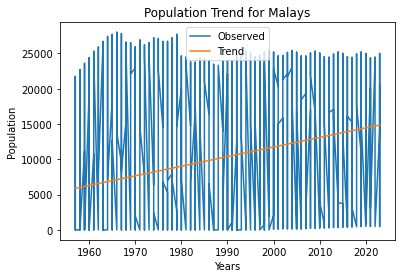

Ethnicity: Malays
                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     279.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.65e-59
Time:                        20:06:05   Log-Likelihood:                -26476.
No. Observations:                2546   AIC:                         5.296e+04
Df Residuals:                    2544   BIC:                         5.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.603e+05   1.62e+04  

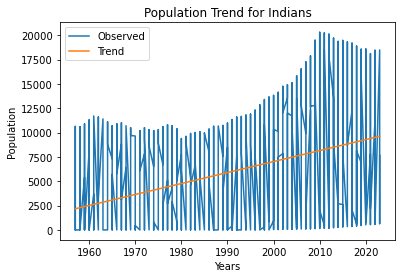

Ethnicity: Indians
                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     662.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.60e-130
Time:                        20:06:05   Log-Likelihood:                -24898.
No. Observations:                2546   AIC:                         4.980e+04
Df Residuals:                    2544   BIC:                         4.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.185e+05   8721.477 

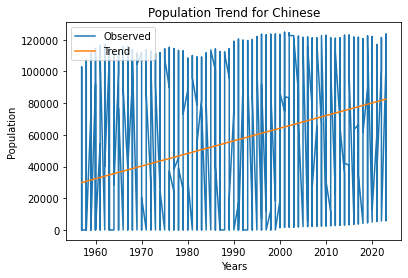

Ethnicity: Chinese
                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     440.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.62e-90
Time:                        20:06:06   Log-Likelihood:                -30397.
No. Observations:                2546   AIC:                         6.080e+04
Df Residuals:                    2544   BIC:                         6.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.53e+06   7.56e+04 

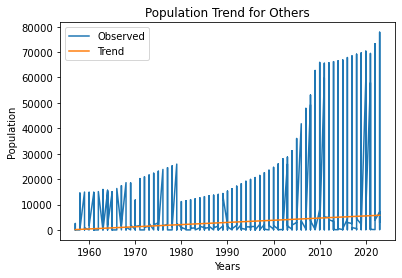

Ethnicity: Others
                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           9.27e-29
Time:                        20:06:06   Log-Likelihood:                -27729.
No. Observations:                2678   AIC:                         5.546e+04
Df Residuals:                    2676   BIC:                         5.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.673e+05   1.51e+04  

In [367]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Year' and 'Population' to numeric and handle any NaN values
mf['Years'] = pd.to_numeric(mf['Years'], errors='coerce')
mf['Population'] = pd.to_numeric(mf['Population'], errors='coerce')

# Drop rows where 'Year' or 'Population' is NaN
mf = mf.dropna(subset=['Years', 'Population'])

# Loop through each ethnic group and perform regression
for ethnicity in mf['Ethnicity'].unique():
    # Filter data for the ethnic group
    data = mf[mf['Ethnicity'] == ethnicity]

    # Ensure data is sorted by year
    data = data.sort_values('Years')

    # Check if there are enough data points for regression
    if len(data) < 2:
        print(f"Not enough data for regression on {ethnicity}")
        continue

    # Fit a linear regression model
    X = sm.add_constant(data['Years'])  # adding a constant
    model = sm.OLS(data['Population'], X).fit()

    # Plotting trend over time
    plt.figure()
    plt.plot(data['Years'], data['Population'], label='Observed')
    plt.plot(data['Years'], model.predict(X), label='Trend')
    plt.title(f"Population Trend for {ethnicity}")
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

    # Output the results
    print(f"Ethnicity: {ethnicity}")
    print(model.summary())